<a href="https://colab.research.google.com/github/isuvo/Data-visualization/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bishop’s University**
## Department of Computer Science
### CS503– Data Visualization

Winter 2024 – Project

Submitted by:

Md Iqbal Hossain Shuvo - 002-34-5029

Sreekar Koduru -

**1. Load the dataset from the CSV file into a DataFrame named diabetes_df**


In [39]:
import pandas as pd
# Load data into a DataFrame
diabetes_df = pd.read_csv('/mnt/data/diabetes2.csv')
print(diabetes_df.head())

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


**2. Data Preprocessing**

a. Preprocess the diabetes_df by scaling all the variables to the range [0,1] using MinMaxScaler



In [40]:
from sklearn.preprocessing import MinMaxScaler

# Preprocess the diabetes_df by scaling all the variables to the range [0,1] using MinMaxScaler
scaler = MinMaxScaler()
diabetes_df_scaled = scaler.fit_transform(diabetes_df)
print(diabetes_df_scaled[:5])

[[0.66666667 1.         0.58264463 0.54929577 0.29411765 0.25697211
  0.20779221 0.28208745 0.562217   0.43939394 0.39252336]
 [0.48333333 0.         0.14876033 0.35211268 0.42156863 0.30677291
  0.62337662 0.14104372 0.22243673 0.16666667 0.15576324]
 [0.88333333 1.         0.51652893 0.43661972 0.28921569 0.25896414
  0.24675325 0.28208745 0.49657763 0.40909091 0.36137072]
 [0.08333333 0.         0.30165289 0.30985915 0.49509804 0.44721116
  0.23376623 0.42313117 0.57292288 0.46969697 0.56386293]
 [0.51666667 0.         0.20661157 0.54929577 0.46568627 0.41733068
  0.38961039 0.28208745 0.36238548 0.33333333 0.34267913]]


b. Convert the scaled data back to a DataFrame named diabetes_df_s for easier visualization

In [41]:
import pandas as pd

# Convert the scaled data back to a DataFrame named diabetes_df_s for easier visualization
diabetes_df_s = pd.DataFrame(diabetes_df_scaled, columns=diabetes_df.columns)
print(diabetes_df_s.head())

        AGE  SEX       BMI        BP        S1        S2        S3        S4  \
0  0.666667  1.0  0.582645  0.549296  0.294118  0.256972  0.207792  0.282087   
1  0.483333  0.0  0.148760  0.352113  0.421569  0.306773  0.623377  0.141044   
2  0.883333  1.0  0.516529  0.436620  0.289216  0.258964  0.246753  0.282087   
3  0.083333  0.0  0.301653  0.309859  0.495098  0.447211  0.233766  0.423131   
4  0.516667  0.0  0.206612  0.549296  0.465686  0.417331  0.389610  0.282087   

         S5        S6         Y  
0  0.562217  0.439394  0.392523  
1  0.222437  0.166667  0.155763  
2  0.496578  0.409091  0.361371  
3  0.572923  0.469697  0.563863  
4  0.362385  0.333333  0.342679  


**3. Compute the variance of each input variable**

In [5]:
variances = diabetes_df_s.drop(columns='Y').var().sort_values(ascending=False)
print(variances)

SEX    0.249561
AGE    0.047735
BP     0.037950
S5     0.033623
BMI    0.033331
S4     0.033128
S6     0.030341
S1     0.028780
S3     0.028216
S2     0.022940
dtype: float64


**4. Plot the bar chart showing the variances**

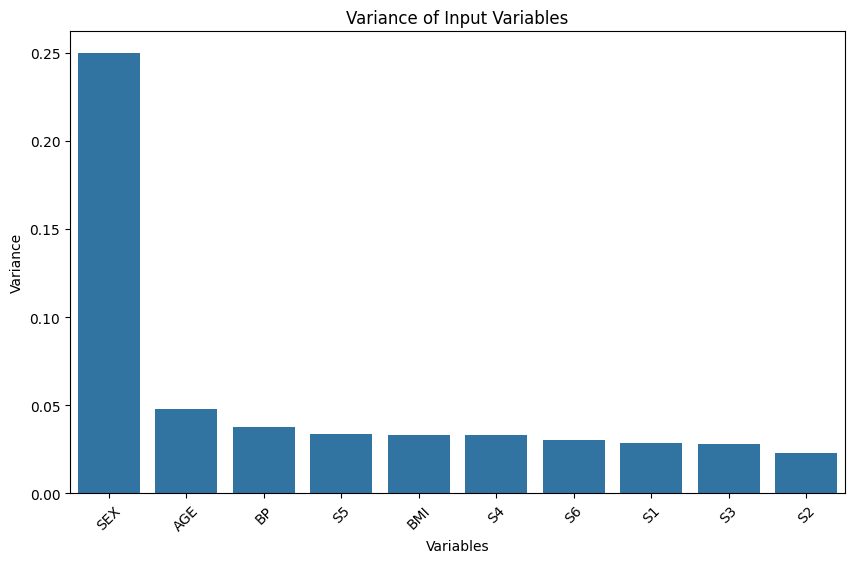

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=variances.index, y=variances.values)
plt.title('Variance of Input Variables')
plt.ylabel('Variance')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.show()

**5. Generate a heatmap to visualize the pair-wise correlation between the variables (input and output variables)**

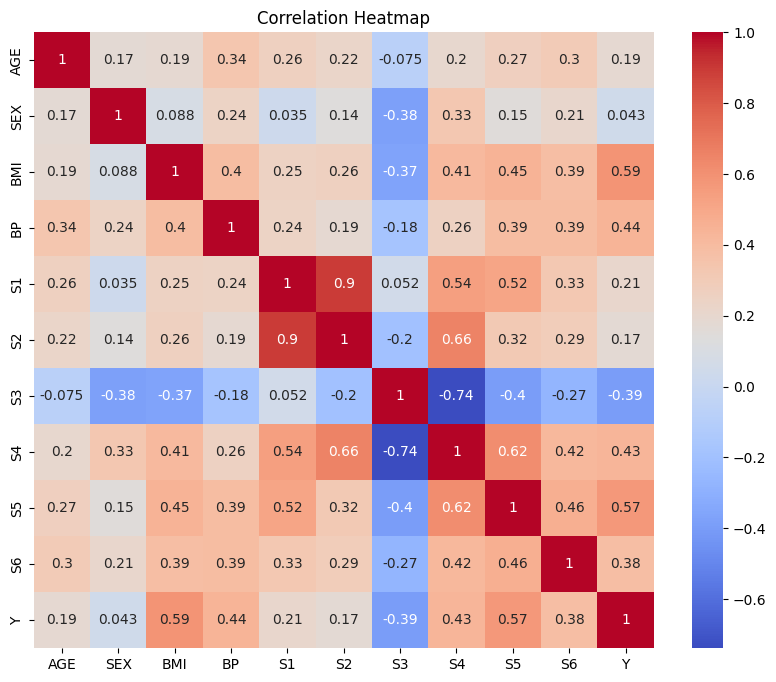

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df_s.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**6. Rank the input variables in descending order based on their correlation with the output variable**

In [50]:
correlation_with_output = diabetes_df_s.corr()['Y'].drop('Y').abs().sort_values(ascending=False)
print('Input variables ranked by correlation with output variable:')
print(correlation_with_output)



Input variables ranked by correlation with output variable:
BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S3     0.394789
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
Name: Y, dtype: float64


**7. Scatter plot using the first two important input variables**

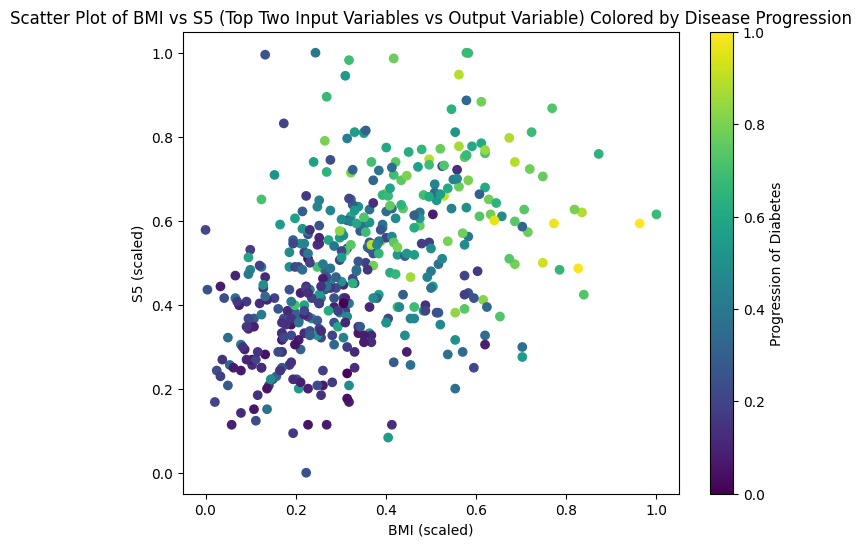

In [51]:
import matplotlib.pyplot as plt

# Using the first two important input variables, generate a scatter to display the data distribution
plt.figure(figsize=(8, 6))
plt.scatter(diabetes_df_s['BMI'], diabetes_df_s['S5'], c=diabetes_df_s['Y'], cmap='viridis')
plt.colorbar(label='Progression of Diabetes')
plt.xlabel('BMI (scaled)')
plt.ylabel('S5 (scaled)')
plt.title('Scatter Plot of BMI vs S5 (Top Two Input Variables vs Output Variable) Colored by Disease Progression')
plt.show()



**8. Apply Lasso regression to the entire dataset (using all variables)**

In [60]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Load the dataset from the CSV file into a DataFrame named diabetes_df
diabetes_df = pd.read_csv('/mnt/data/diabetes2.csv')

# Split the data into input features (X) and output variable (y)
X = diabetes_df.drop('Y', axis=1)
y = diabetes_df['Y']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Lasso regression to the entire dataset (using all variables)
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

8a. Lasso regression involves a regularization parameter, denoted as alpha ∝ in the Scikit-learn ML tool. A higher value of alpha (also known as lambda) leads to more regularization, which in turn shrinks the coefficients towards zero, effectively reducing the complexity of the model and selecting only the most important variables.

**(This step doesn't require any code since it's an explanation of the Lasso regression and the alpha parameter.)**

**8b. Using Mean Squared Error (MSE) to calculate the average squared difference between the predicted and actual values.**

Lower MSE values indicate better model performance. Scikit-learn provides a function for calculating MSE.

In [61]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = lasso.predict(X_test)
# Get the actual data (true values) from the test set
y_test = y_test.values

# Print the predicted data
print("Predicted Data:")
print(y_pred)

# Print the actual data
print("\nActual Data:")
print(y_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.2f}")


Predicted Data:
[139.62501114 181.88228597 141.80496809 284.70951216 123.24890842
  94.56290607 261.78534809 191.91624537  82.14811253 117.65179038
  95.33176714 154.07836809  67.58446422 206.647814   101.92388005
 137.48177021 223.35534749 247.66141416 200.15982215 215.90019284
 203.16076649  87.39816204  71.96026498 190.6051579  158.23134882
 167.5013307  195.18889773 177.09222289  49.72089534 115.70455133
 183.88425464  93.14108089 134.12068185 180.32535158 171.42502755
 196.90048335 124.48523739 120.08951736 146.23130964  59.92279226
  74.95792937 111.95732351 161.92430774 146.85271981 169.54772779
  66.69925871  81.26227326 101.42242475  59.65073024 155.67853806
 159.94488432  65.6453041  120.5997341  106.4814368  168.16177708
 163.42786684  93.60220225 209.54451061 116.24502916  63.14299186
 181.26182838 198.61985134 147.52960592 109.24101046 120.54289123
 200.97277171 167.05162952 161.92743247 113.88691101 140.79079778
 178.4126334  195.20140662 228.92549684 144.0488368   81.525

**8. c. Compute the MSE of Lasso regression for different values of alpha: 0, 1, 10, 100, 500, and 1000.**

In [65]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize lists to store MSE values for different alphas
mse_values = []

# Define the alpha values to test
alpha_values = [0, 1, 10, 100, 500, 1000]

# Apply Linear Regression for alpha = 0 and Lasso Regression for other alpha values
for alpha in alpha_values:
    if alpha == 0:
        model = LinearRegression()
    else:
        model = Lasso(alpha=alpha)
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

# Outputting the MSE values for each alpha
for alpha, mse in zip(alpha_values, mse_values):
    print(f"Alpha= {alpha}, MSE: {mse}")


Alpha= 0, MSE: 2859.6963475867506
Alpha= 1, MSE: 2901.5847284544093
Alpha= 10, MSE: 3100.1277343852666
Alpha= 100, MSE: 3855.4873897952034
Alpha= 500, MSE: 5872.519336352451
Alpha= 1000, MSE: 5929.884896910383


**8. d. Plot the curve showing the variation of MSE with respect to alpha.**

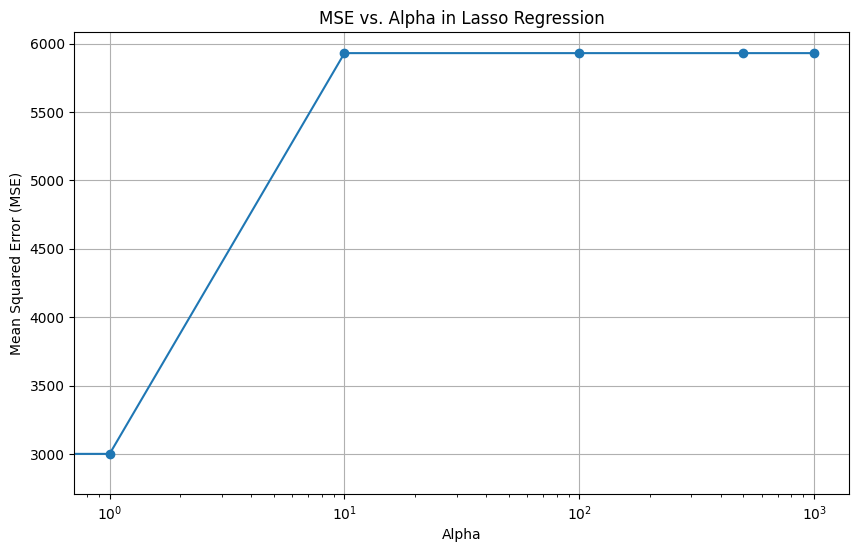

In [66]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and prepare the data
diabetes_df = pd.read_csv('/mnt/data/diabetes2.csv')
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(diabetes_df.drop(columns='Y'))
diabetes_df_s = pd.DataFrame(scaled_data, columns=diabetes_df.columns[:-1])
diabetes_df_s['Y'] = diabetes_df['Y']
X = diabetes_df_s.drop(columns='Y')
y = diabetes_df_s['Y']

# Initialize the MSE values list and define alpha values
mse_values_specific = []
alpha_values = [0, 1, 10, 100, 500, 1000]

# Compute MSE for each alpha
for alpha in alpha_values:
    if alpha == 0:
        model = LinearRegression()
    else:
        model = Lasso(alpha=alpha)
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mse_values_specific.append(mse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_values_specific, marker='o')
plt.title('MSE vs. Alpha in Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.xscale('log')
plt.grid(True)
plt.show()



**8. e. Displaying the best MSE and the corresponding alpha value.**

In [70]:
import numpy as np

best_alpha = alpha_values[np.argmin(mse_values_specific)]
best_mse = min(mse_values_specific)
print(f"Best Alpha: {best_alpha}, Best MSE: {best_mse:.2f}")


Best Alpha: 0, Best MSE: 2859.70


**8. f. Plotting the evolution of Lasso coefficients against alpha**

Best MSE: 2859.6963475867506
Corresponding Alpha: 0


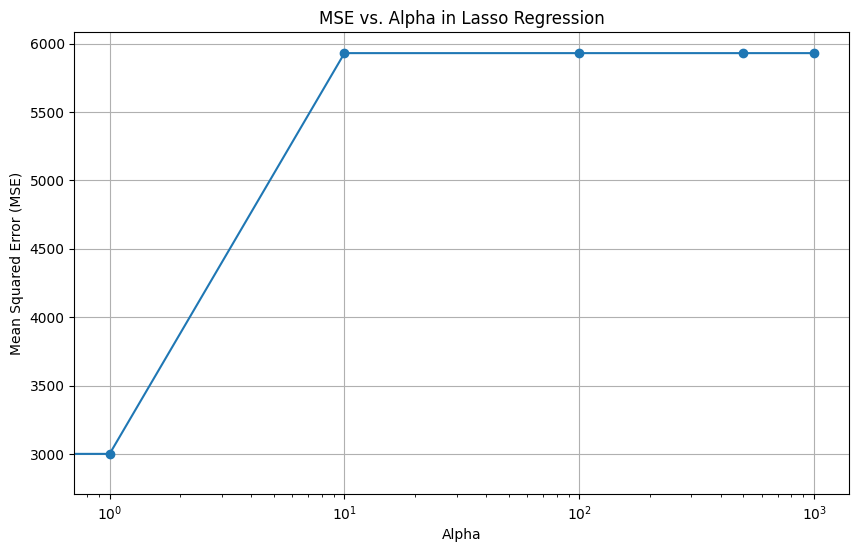

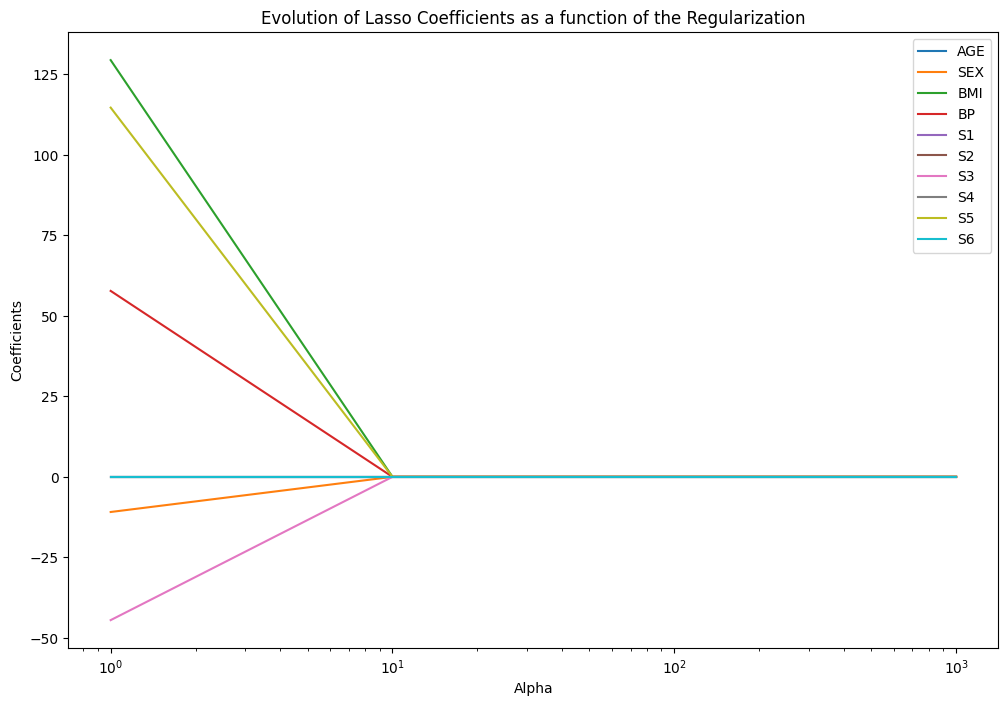

In [74]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

# Load the dataset
diabetes_df = pd.read_csv('/mnt/data/diabetes2.csv')

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(diabetes_df.drop(columns='Y'))
diabetes_df_s = pd.DataFrame(scaled_data, columns=diabetes_df.columns[:-1])
diabetes_df_s['Y'] = diabetes_df['Y']

# Define input and output
X = diabetes_df_s.drop(columns='Y')
y = diabetes_df_s['Y']

# Define alpha values
alpha_values = [0, 1, 10, 100, 500, 1000]

# Initialize list to store MSE values
mse_values = []
coefficients = []

# Compute MSE and coefficients for each alpha
for alpha in alpha_values:
    if alpha == 0:
        model = LinearRegression()
    else:
        model = Lasso(alpha=alpha)
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)
    coefficients.append(model.coef_)

# Find the best MSE and corresponding alpha
best_mse_index = np.argmin(mse_values)
best_mse = mse_values[best_mse_index]
best_alpha = alpha_values[best_mse_index]

# Output the best MSE and its alpha
print("Best MSE:", best_mse)
print("Corresponding Alpha:", best_alpha)

display(HTML('<br>'))
# Plot MSE vs. Alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_values, marker='o')
plt.title('MSE vs. Alpha in Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.xscale('log')
plt.grid(True)
plt.show()

display(HTML('<br>'))
# Plot the evolution of Lasso coefficients
plt.figure(figsize=(12, 8))
for i in range(X.shape[1]):  # Iterating through each coefficient
    plt.plot(alpha_values[1:], [coef[i] for coef in coefficients[1:]], label=X.columns[i])

plt.title('Evolution of Lasso Coefficients as a function of the Regularization')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.xscale('log')
plt.legend()
plt.show()




**9.a: Utilize PC1 and PC2 and visualize the data scatter.**



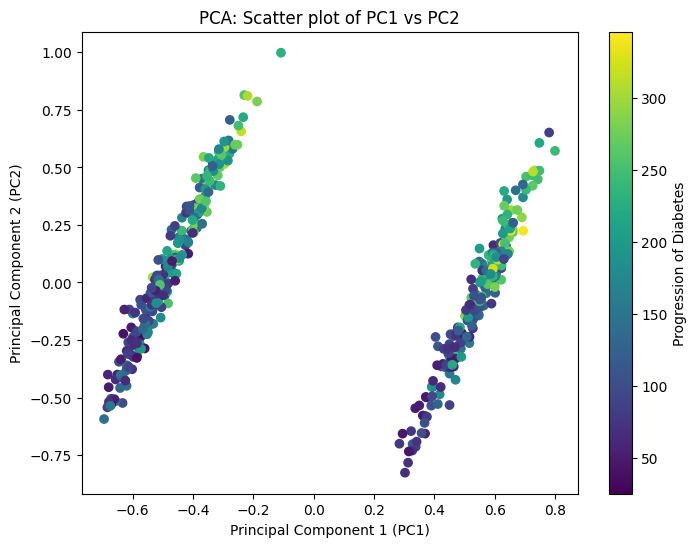

In [75]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Y'] = y  # Adding the target variable for coloring

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Y'], cmap='viridis')
plt.colorbar(label='Progression of Diabetes')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA: Scatter plot of PC1 vs PC2')
plt.show()


**9.b: Plot the loadings to examine how the variables contribute to PC1 and PC2.**

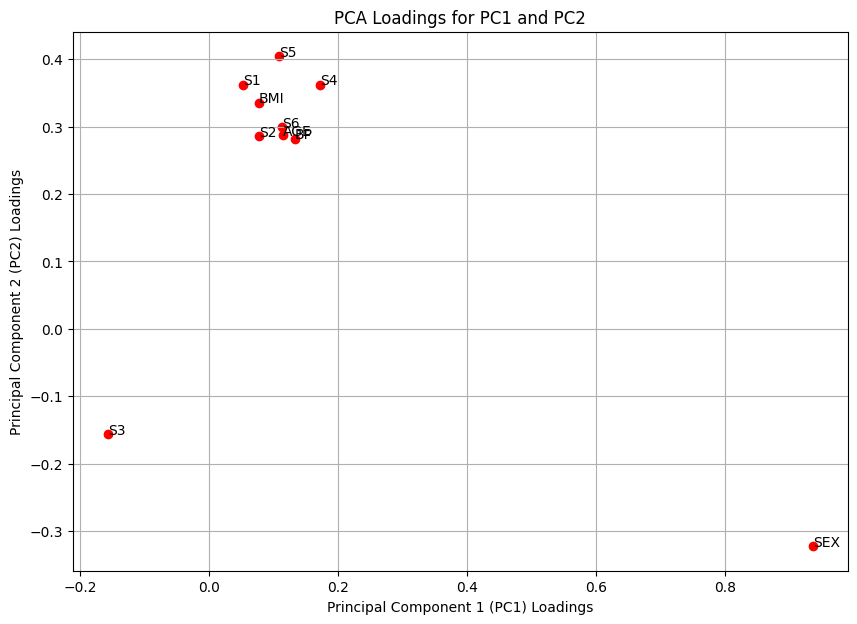

In [18]:
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)

plt.figure(figsize=(10, 7))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'], color='red')
for i, txt in enumerate(loadings_df.index):
    plt.annotate(txt, (loadings_df['PC1'][i], loadings_df['PC2'][i]))
plt.xlabel('Principal Component 1 (PC1) Loadings')
plt.ylabel('Principal Component 2 (PC2) Loadings')
plt.title('PCA Loadings for PC1 and PC2')
plt.grid(True)
plt.show()


**9.c: Perform normal linear regression, using PC1 only.**


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_pc1 = pca_df[['PC1']]
model_pc1 = LinearRegression()
model_pc1.fit(X_pc1, y)

y_pred_pc1 = model_pc1.predict(X_pc1)
mse_pc1 = mean_squared_error(y, y_pred_pc1)
# Printing the result
print("Mean Squared Error using PC1 only:", mse_pc1)

# Perform normal linear regression, using PC1 only
#X_pc1 = X_pca[:, 0].reshape(-1, 1)
#lr_pc1 = LinearRegression()
#lr_pc1.fit(X_pc1, y)


Mean Squared Error using PC1 only: 5748.875188055216


**9.d: Plot the regression line on the scatter.**

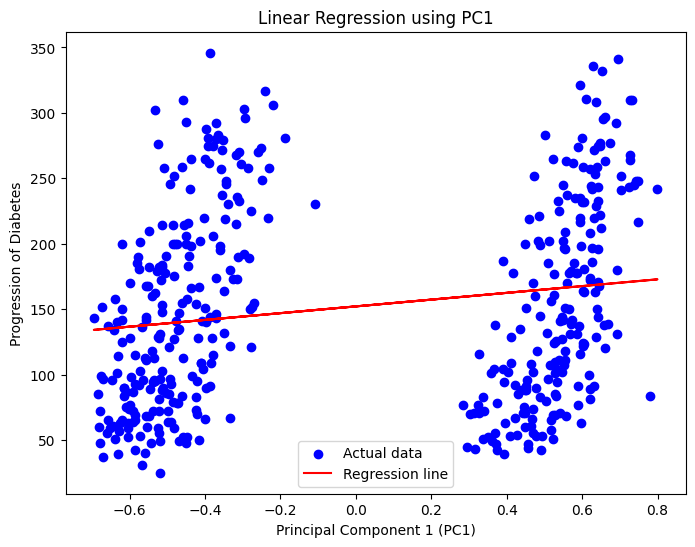

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Adding label for actual data points
plt.scatter(X_pc1, y, color='blue', label='Actual data')
# Adding label for the regression line
plt.plot(X_pc1, y_pred_pc1, color='red', label='Regression line')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Progression of Diabetes')
plt.title('Linear Regression using PC1')
plt.legend()  # Displaying the legend
plt.show()



**9.e: Perform normal linear regression, using PC1 and PC2.**

In [82]:
X_pc1_pc2 = pca_df[['PC1', 'PC2']]
model_pc1_pc2 = LinearRegression()
model_pc1_pc2.fit(X_pc1_pc2, y)
y_pred_pc1_pc2 = model_pc1_pc2.predict(X_pc1_pc2)
mse_pc1_pc2 = mean_squared_error(y, y_pred_pc1_pc2)
print("MSE using PC1 and PC2:", mse_pc1_pc2)


MSE using PC1 and PC2: 3833.485785343128


**9.f: Plot the regression hyper-line on the scatter.**

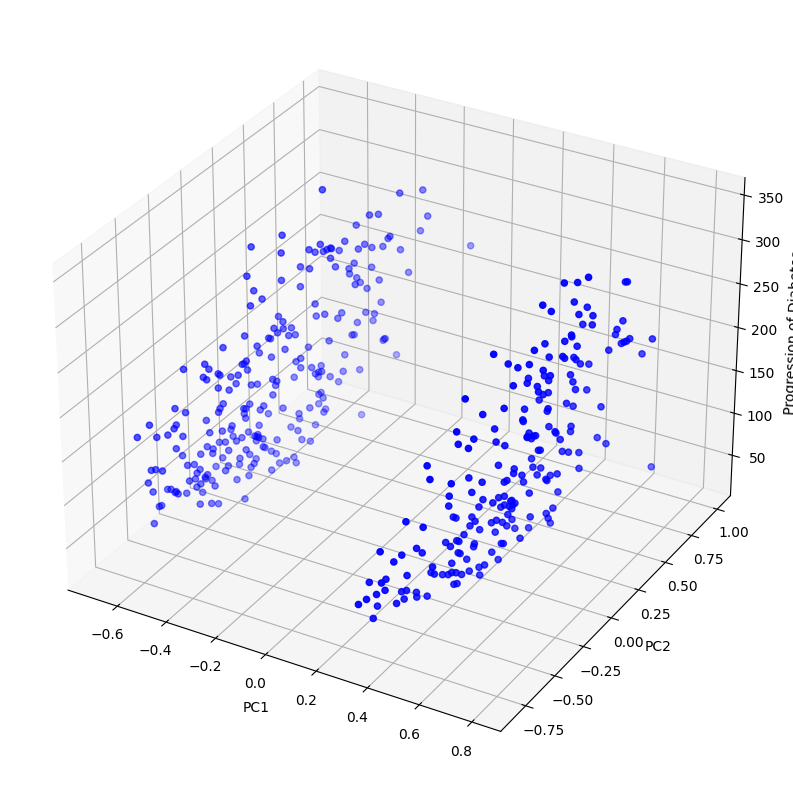

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pc1_pc2['PC1'], X_pc1_pc2['PC2'], y, color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Progression of Diabetes')
plt.show()


**9.g: Using bar chart, calculate, and display the MSE for both cases 9.c and 9.e.**

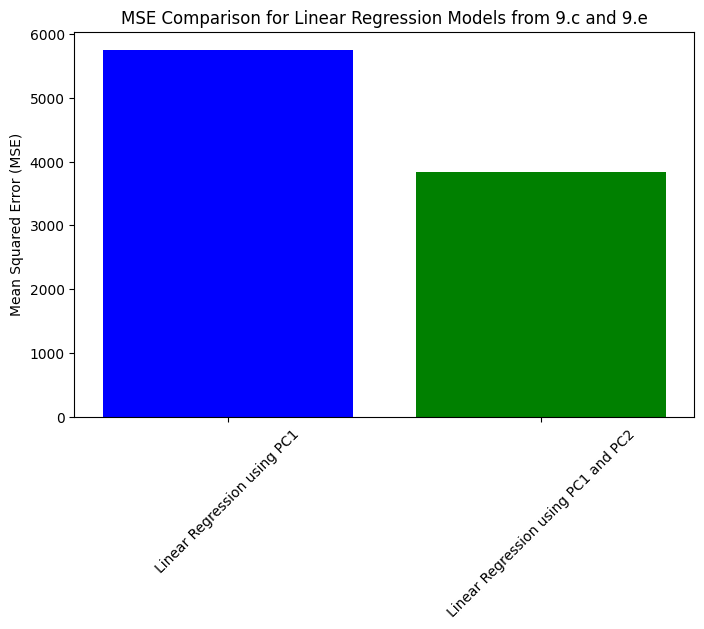

In [86]:
plt.figure(figsize=(8, 5))
plt.bar(['Linear Regression using PC1', 'Linear Regression using PC1 and PC2'], [mse_pc1, mse_pc1_pc2], color=['blue', 'green'])
plt.xticks(rotation=45)
plt.title('MSE Comparison for Linear Regression Models from 9.c and 9.e')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()


**10. Dimensionality Reduction with t-SNE**

**10.a: Visualize the data scatter using t-SNE with different perplexity values.**

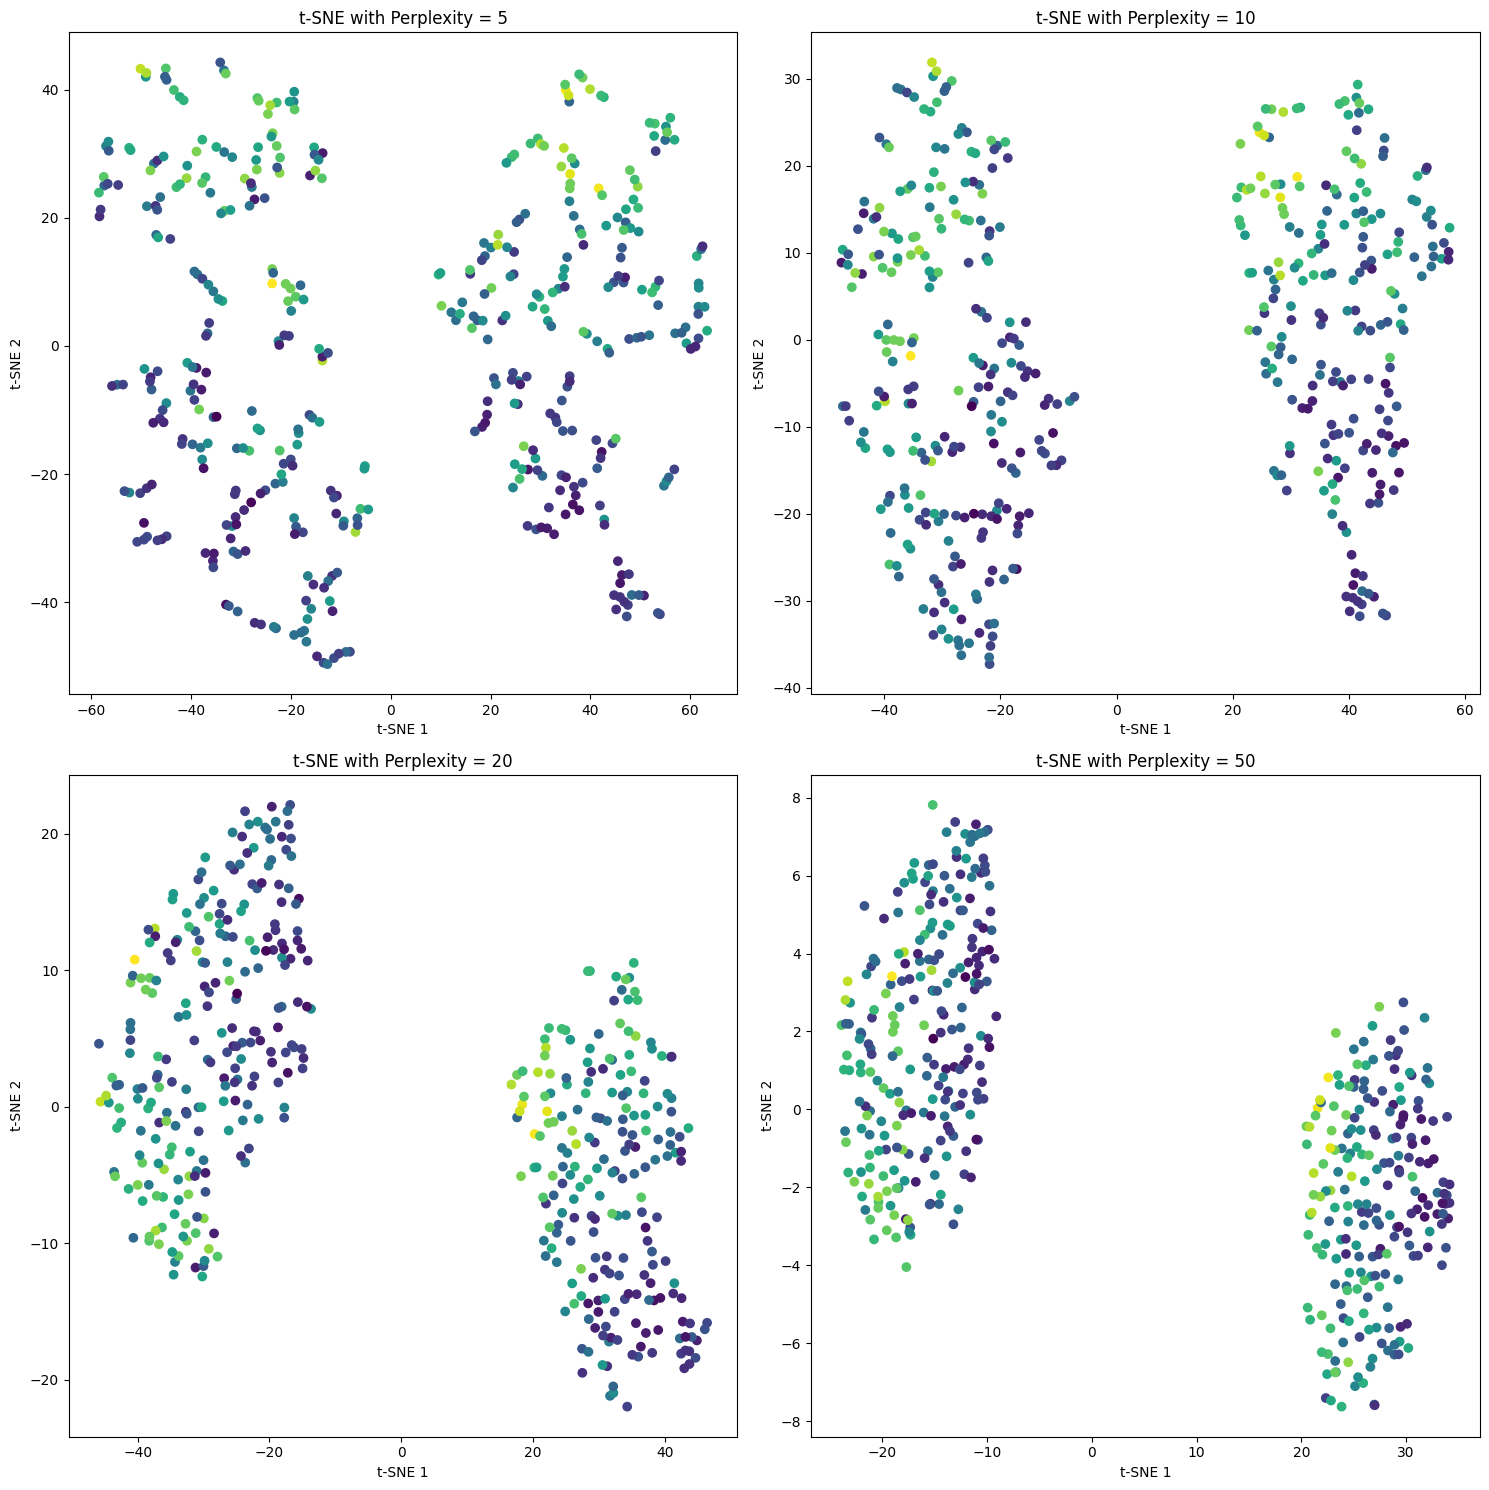

In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

perplexities = [5, 10, 20, 50]

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

for i, perplexity in enumerate(perplexities):
    # Applying t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Plotting
    axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f't-SNE with Perplexity = {perplexity}')
    axes[i].set_xlabel('t-SNE 1')
    axes[i].set_ylabel('t-SNE 2')

plt.tight_layout()
plt.show()


**10.b: Perform normal linear regression using only the 1st t-SNE dimension.**

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Using a common perplexity value for demonstration
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Linear regression using the first t-SNE dimension
X_tsne_1d = X_tsne[:, 0].reshape(-1, 1)
model_tsne_1d = LinearRegression()
model_tsne_1d.fit(X_tsne_1d, y)
y_pred_tsne_1d = model_tsne_1d.predict(X_tsne_1d)

# Calculating MSE
mse_tsne_1d = mean_squared_error(y, y_pred_tsne_1d)
print(mse_tsne_1d)


5918.265620986021


**10.c: Plot the regression line on the t-SNE scatter.**

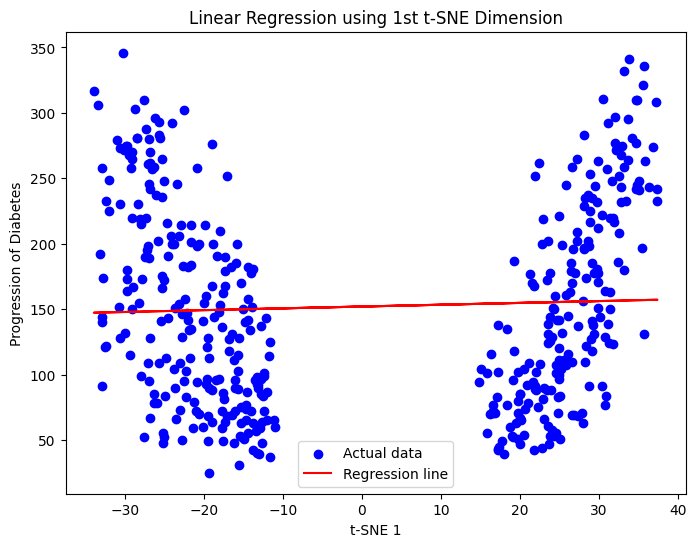

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_1d, y, color='blue', label='Actual data')
plt.plot(X_tsne_1d, y_pred_tsne_1d, color='red', label='Regression line')
plt.xlabel('t-SNE 1')
plt.ylabel('Progression of Diabetes')
plt.title('Linear Regression using 1st t-SNE Dimension')
plt.legend()
plt.show()


**10.d: Perform linear regression using the 1st and 2nd t-SNE dimensions.**

In [97]:
# Linear regression using the first t-SNE dimension
X_tsne_1d = X_tsne[:, 0].reshape(-1, 1)
model_tsne_1d = LinearRegression()
model_tsne_1d.fit(X_tsne_1d, y)
y_pred_tsne_1d = model_tsne_1d.predict(X_tsne_1d)

# Calculating MSE
mse_tsne_1d = mean_squared_error(y, y_pred_tsne_1d)
print('t-SNE 1D:', mse_tsne_1d)

# Linear regression using the second t-SNE dimension
model_tsne_2d = LinearRegression()
model_tsne_2d.fit(X_tsne, y)
y_pred_tsne_2d = model_tsne_2d.predict(X_tsne)

# Calculating MSE
mse_tsne_2d = mean_squared_error(y, y_pred_tsne_2d)
print('t-SNE 2D:', + mse_tsne_2d)

t-SNE 1D: 5918.265620986021
t-SNE 2D: 5913.172936225468


**10.e: Plot the regression hyper-line on the t-SNE scatter.**

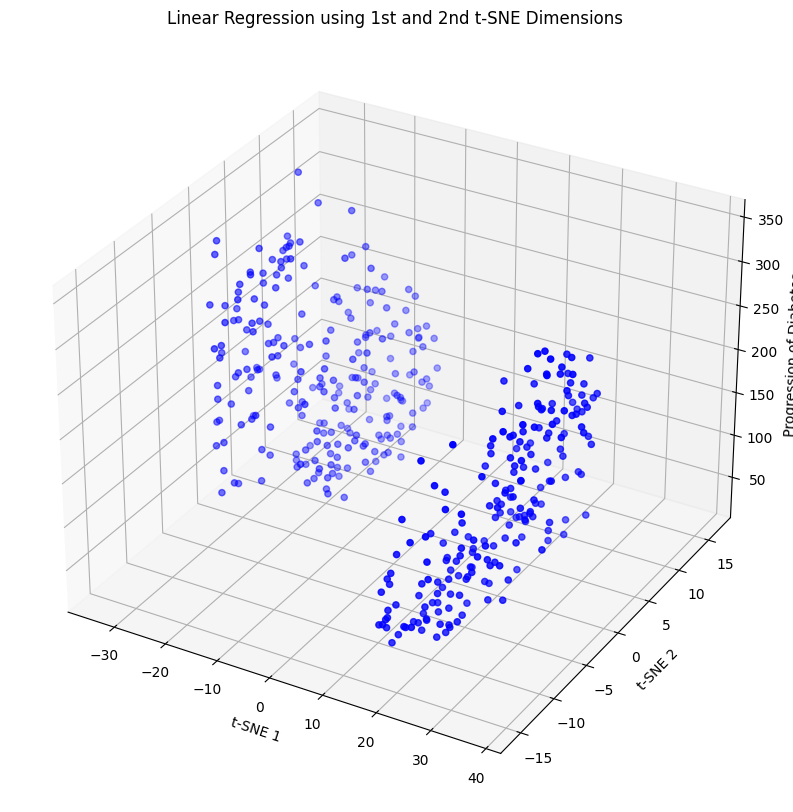

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], y, color='blue')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('Progression of Diabetes')
plt.title('Linear Regression using 1st and 2nd t-SNE Dimensions')
plt.show()


**10.f: Compare using bar chart, calculate, and display the MSE for both cases 10.b and 10.d.**

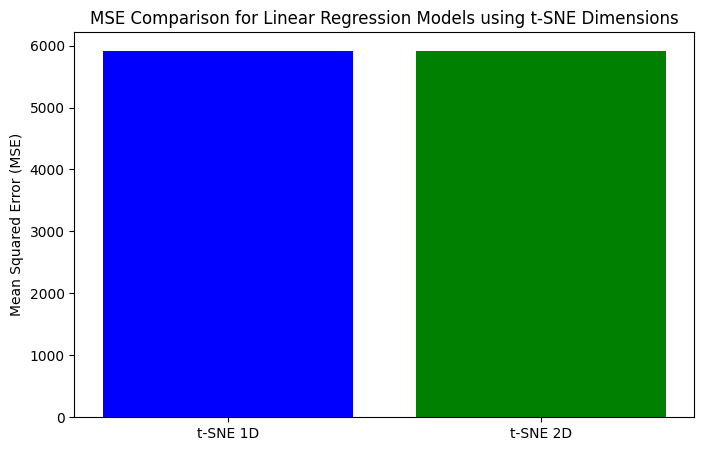

In [29]:
plt.figure(figsize=(8, 5))
plt.bar(['t-SNE 1D', 't-SNE 2D'], [mse_tsne_1d, mse_tsne_2d], color=['blue', 'green'])
plt.title('MSE Comparison for Linear Regression Models using t-SNE Dimensions')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()


**11. Dimensionality Reduction with UMAP**

In [98]:
pip install umap-learn


**11.a: Visualize the data scatter using UMAP with different n_neighbors values.**

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

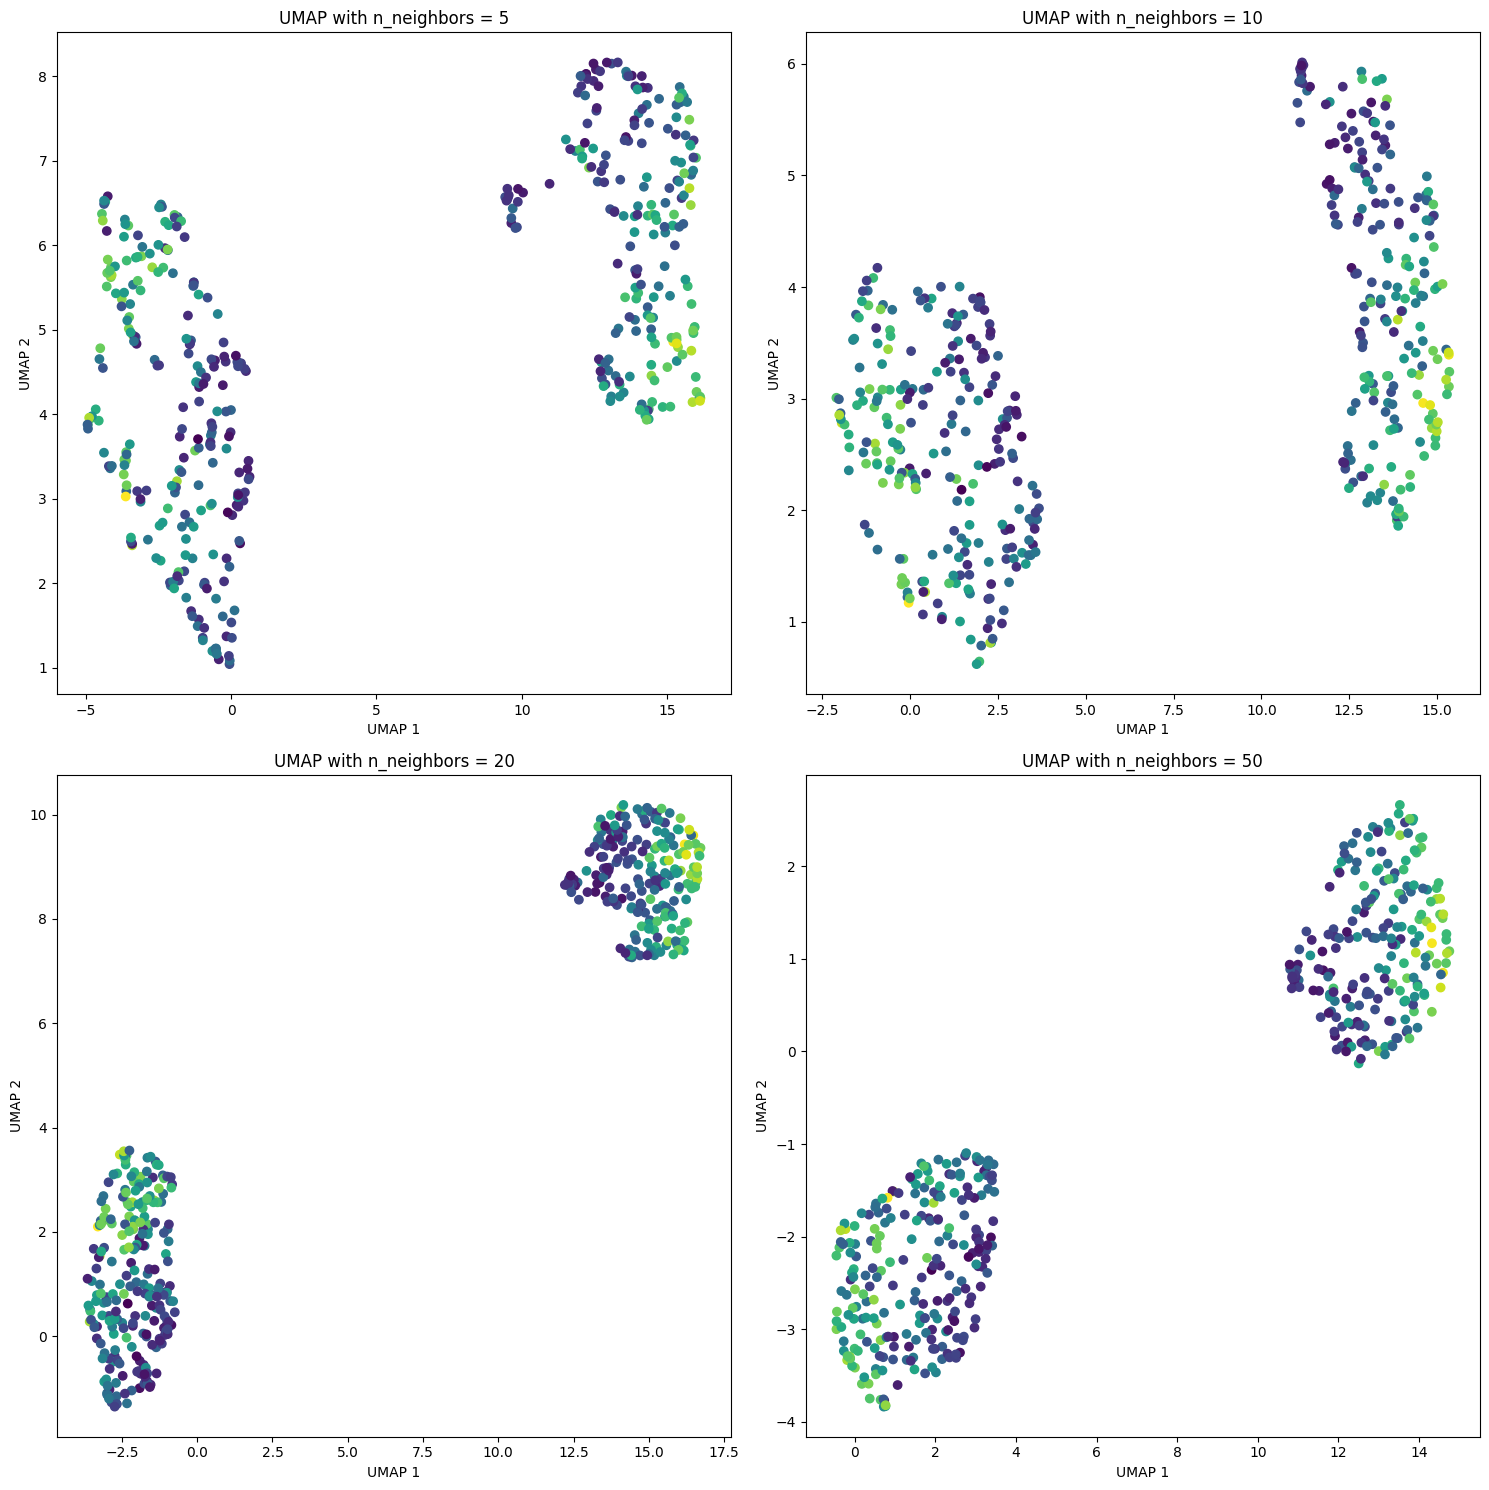

In [31]:
import umap
import matplotlib.pyplot as plt

n_neighbors_values = [5, 10, 20, 50]

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

for i, n_neighbors in enumerate(n_neighbors_values):
    # Applying UMAP
    reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, random_state=42)
    X_umap = reducer.fit_transform(X)

    # Plotting
    axes[i].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f'UMAP with n_neighbors = {n_neighbors}')
    axes[i].set_xlabel('UMAP 1')
    axes[i].set_ylabel('UMAP 2')

plt.tight_layout()
plt.show()


**11.b: Perform linear regression using only the 1st UMAP dimension.**

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reducer = umap.UMAP(n_components=2, n_neighbors=15, random_state=42)
X_umap = reducer.fit_transform(X)

# Linear regression using the first UMAP dimension
X_umap_1d = X_umap[:, 0].reshape(-1, 1)
model_umap_1d = LinearRegression()
model_umap_1d.fit(X_umap_1d, y)
y_pred_umap_1d = model_umap_1d.predict(X_umap_1d)

# Calculating MSE
mse_umap_1d = mean_squared_error(y, y_pred_umap_1d)
print(mse_umap_1d)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


5914.51258863114


**11.c: Plot the regression line on the UMAP scatter.**

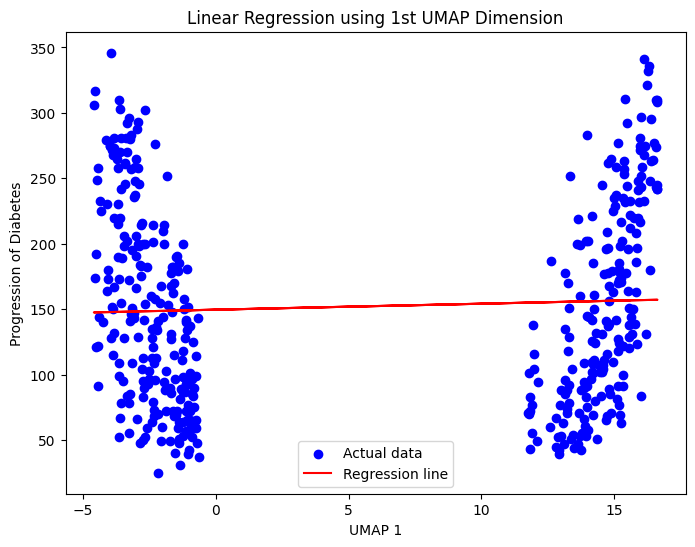

In [100]:
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_1d, y, color='blue', label='Actual data')
plt.plot(X_umap_1d, y_pred_umap_1d, color='red', label='Regression line')
plt.xlabel('UMAP 1')
plt.ylabel('Progression of Diabetes')
plt.title('Linear Regression using 1st UMAP Dimension')
plt.legend()
plt.show()


**11.d: Perform linear regression using the 1st and 2nd UMAP dimensions.**

In [102]:
X_umap_1d = X_umap[:, 0].reshape(-1, 1)
model_umap_1d = LinearRegression()
model_umap_1d.fit(X_umap_1d, y)
y_pred_umap_1d = model_umap_1d.predict(X_umap_1d)

# Calculating MSE
mse_umap_1d = mean_squared_error(y, y_pred_umap_1d)
print('MSE UMAP 1D:', mse_umap_1d)


model_umap_2d = LinearRegression()
model_umap_2d.fit(X_umap, y)
y_pred_umap_2d = model_umap_2d.predict(X_umap)

# Calculating MSE
mse_umap_2d = mean_squared_error(y, y_pred_umap_2d)
print('MSE UMAP 2D:', mse_umap_2d)

MSE UMAP 1D: 5914.51258863114
MSE UMAP 2D: 5753.051821779287


**11.e: Plot the regression hyper-line on the UMAP scatter.**

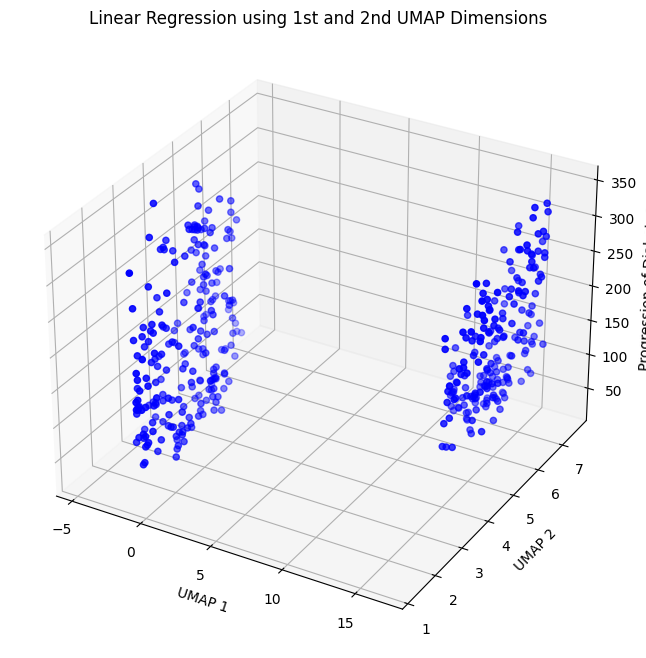

In [103]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap[:, 0], X_umap[:, 1], y, color='blue')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('Progression of Diabetes')
plt.title('Linear Regression using 1st and 2nd UMAP Dimensions')
plt.show()


**11.f: Compare Uusing bar chart, calculate, and display the MSE for both cases 11.b and 11.d.**

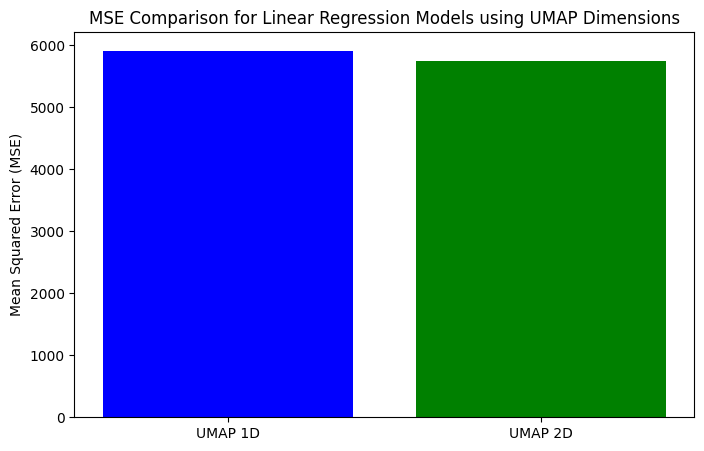

In [104]:
plt.figure(figsize=(8, 5))
plt.bar(['UMAP 1D', 'UMAP 2D'], [mse_umap_1d, mse_umap_2d], color=['blue', 'green'])
plt.title('MSE Comparison for Linear Regression Models using UMAP Dimensions')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()


**11. g. Compare LR applied to PCA, t-SNE and UMAP**

In [105]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load and preprocess the data
diabetes_df = pd.read_csv('/mnt/data/diabetes2.csv')
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(diabetes_df.drop(columns='Y'))
X = pd.DataFrame(scaled_data, columns=diabetes_df.columns[:-1])
y = diabetes_df['Y']

# Function to perform linear regression and calculate MSE
def compute_mse(X_input, y):
    model = LinearRegression()
    model.fit(X_input, y)
    y_pred = model.predict(X_input)
    return mean_squared_error(y, y_pred)

# Initializing dictionaries to store MSE values
mse_values = {'PCA': {}, 't-SNE': {}, 'UMAP': {}}

# PCA for 1D, 2D, and 3D
for n in [1, 2, 3]:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    mse_values['PCA'][f'{n}D'] = compute_mse(X_pca, y)

# t-SNE for 1D, 2D, and now 3D
for n in [1, 2, 3]:  # Now includes 3D
    tsne = TSNE(n_components=n, random_state=42)
    X_tsne = tsne.fit_transform(X)
    mse_values['t-SNE'][f'{n}D'] = compute_mse(X_tsne, y)

# UMAP for 1D, 2D, and 3D
for n in [1, 2, 3]:
    reducer = umap.UMAP(n_components=n, random_state=42)
    X_umap = reducer.fit_transform(X)
    mse_values['UMAP'][f'{n}D'] = compute_mse(X_umap, y)

# Creating a DataFrame from the MSE values
df_mse = pd.DataFrame(mse_values)

# Display the DataFrame
print(df_mse)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


            PCA        t-SNE         UMAP
1D  5748.875188  5919.637529  5898.903531
2D  3833.485785  5913.172936  5753.051822
3D  3804.510860  4408.660985  5196.735827
